#### init

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from toy_exp import Experiment
from src.rot_analysis.spectral_power import SpectralPower, histogram

In [3]:
from src.models import UNet

### CONSTANTS

In [4]:
DEVICE='cuda'

## Baseline

/home/gaby/These/src/Fundus/SteeredCNN/coherent-gradient-toys/src/rot_analysis/spectral_power.py:49: UserWarning:

__floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').



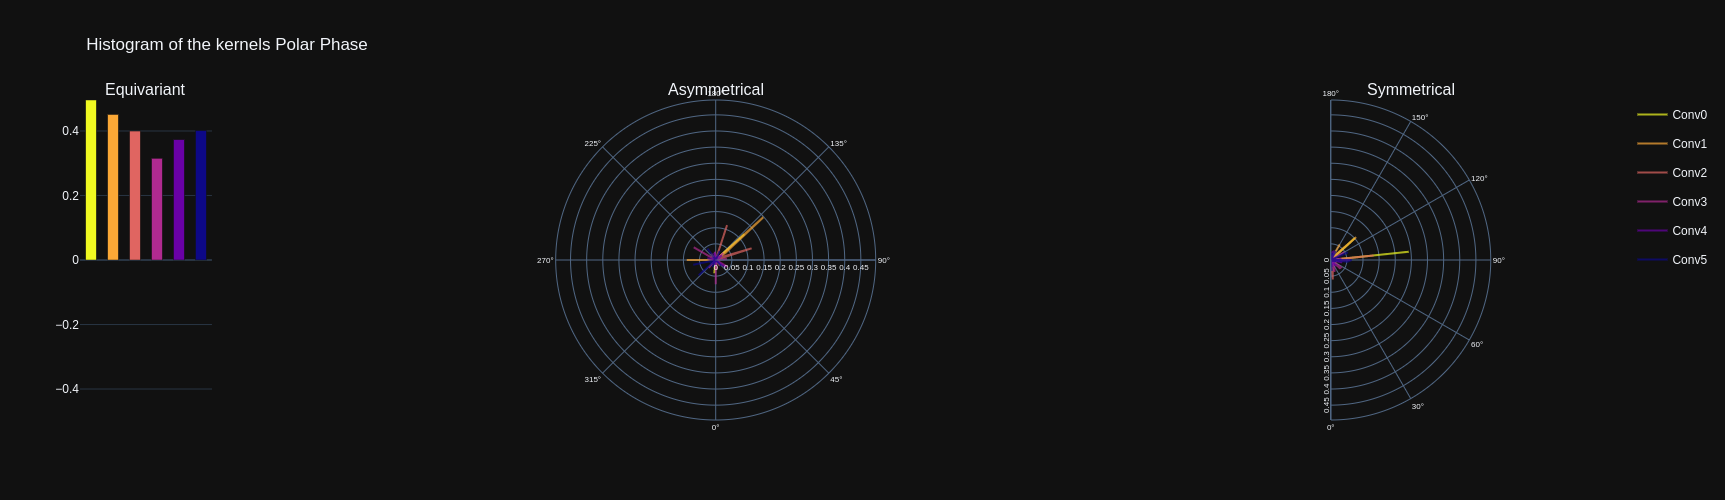

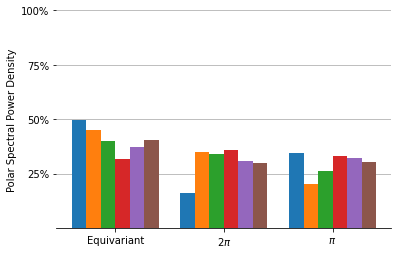

In [15]:
model = UNet(1, 1, 2, kernel=5, nscale=2, downsampling='conv')
SP0 = SpectralPower.kernels_psp(model)
SP0.plot_sp(split='normed', sort_sym_rank=None)
SP0.plot_phases(normalize=True)

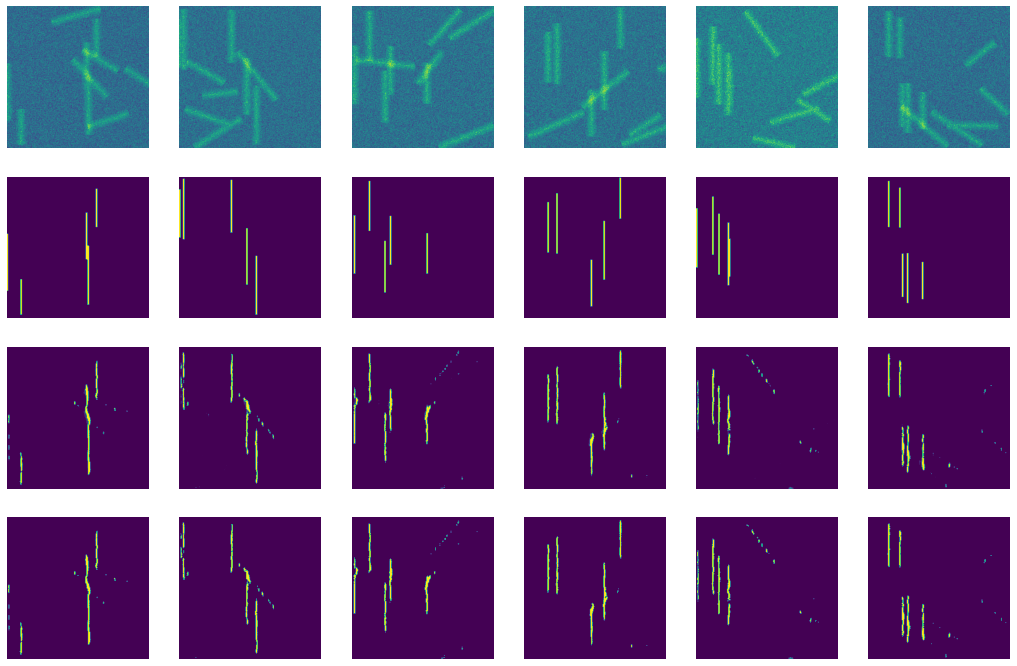

In [24]:
model = UNet(1, 1, 2, kernel=5, depth=3, nscale=1, downsampling='conv')
base = Experiment(model, gen_opt={'orientation': 0}, gen2_opt={'orientation': (np.pi/5, 4*np.pi/5)})
base.noise_std = .2
base.train()
fig = base.plot_test_samples()

/home/gaby/These/src/Fundus/SteeredCNN/coherent-gradient-toys/src/rot_analysis/spectral_power.py:49: UserWarning:

__floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').



<AxesSubplot:ylabel='Polar Spectral Power Density'>

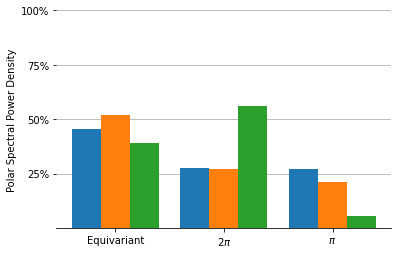

In [25]:
SP1 = SpectralPower.kernels_psp(base.net)
SP1.plot_sp(split='normed', sort_sym_rank=None)

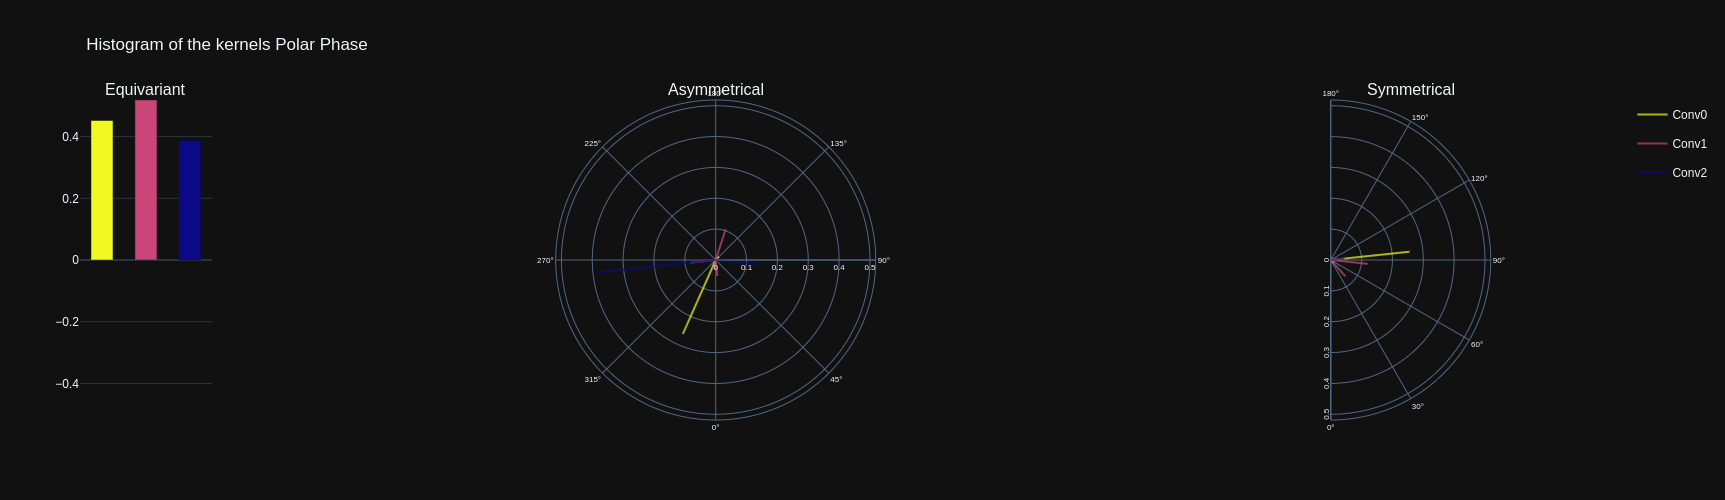

In [26]:
SP1.plot_phases(normalize=True)

## End

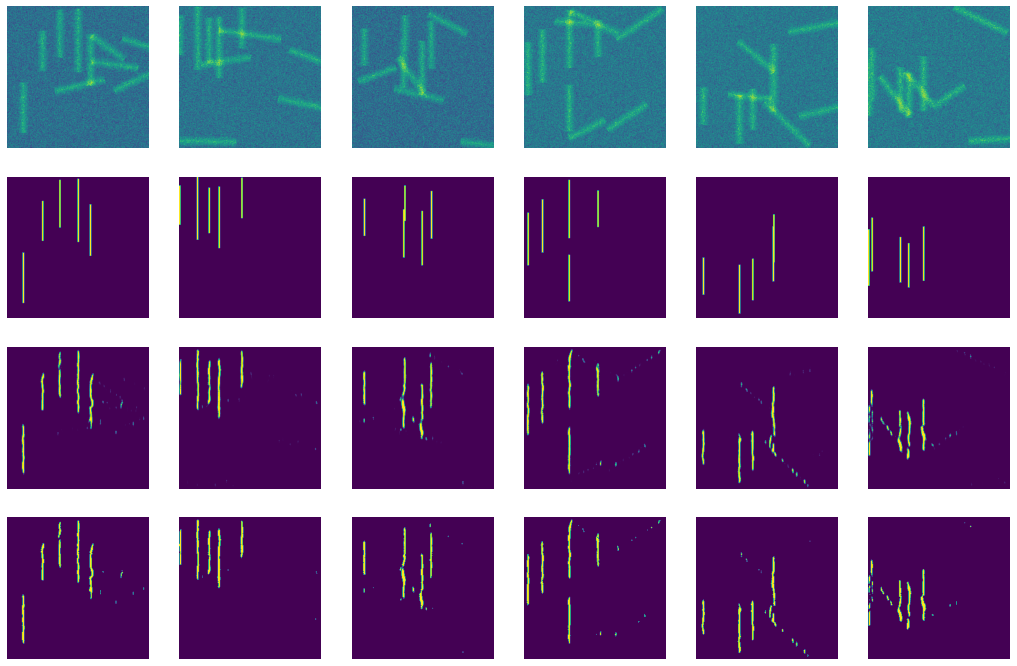

In [9]:
baseVertical = Experiment(UNet(1, 1, 8, kernel=5, nscale=1, depth=3, downsampling='conv'),
                  )
baseVertical.noise_std = .2
baseVertical.train()
fig = baseVertical.plot_test_samples()

/home/gaby/These/src/Fundus/SteeredCNN/coherent-gradient-toys/src/rot_analysis/spectral_power.py:49: UserWarning:

__floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').



<AxesSubplot:ylabel='Polar Spectral Power Density'>

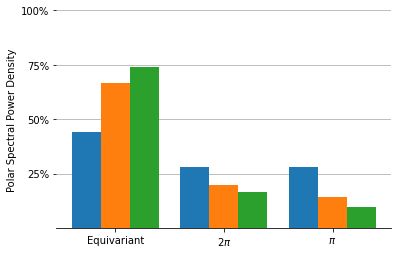

In [10]:
SP2 = SpectralPower.kernels_psp(baseVertical.net)
SP2.plot_sp(split='normed', sort_sym_rank=None)

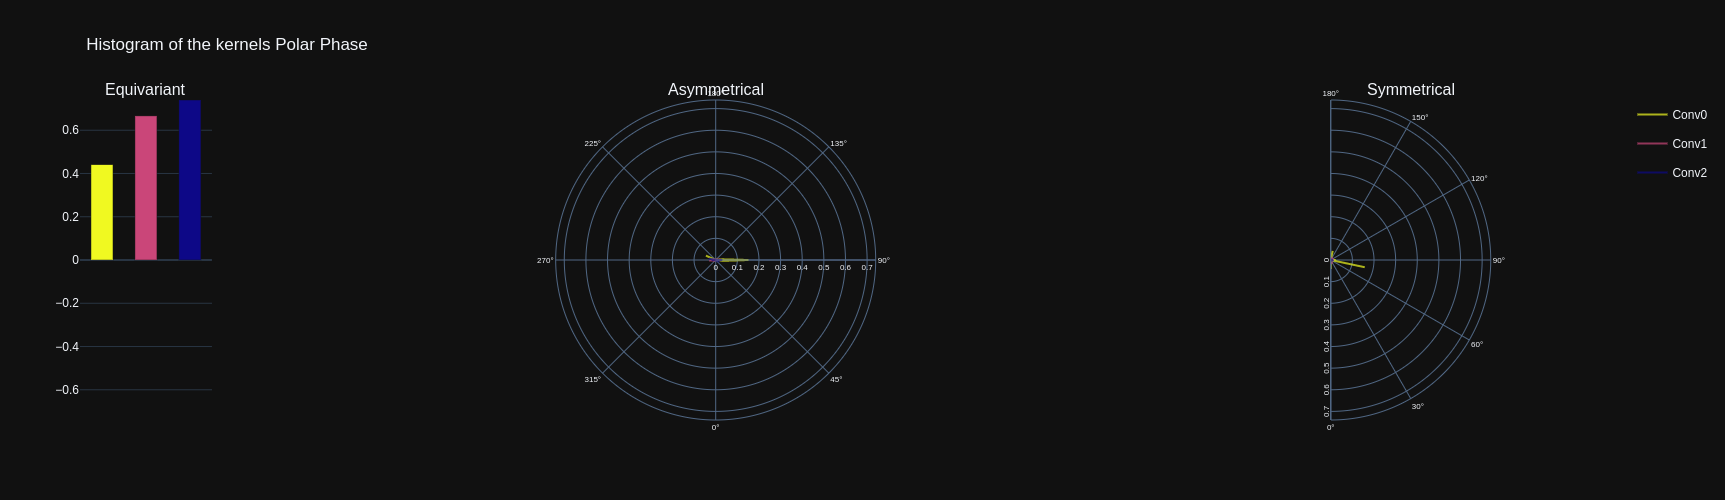

In [11]:
SP2.plot_phases(True)

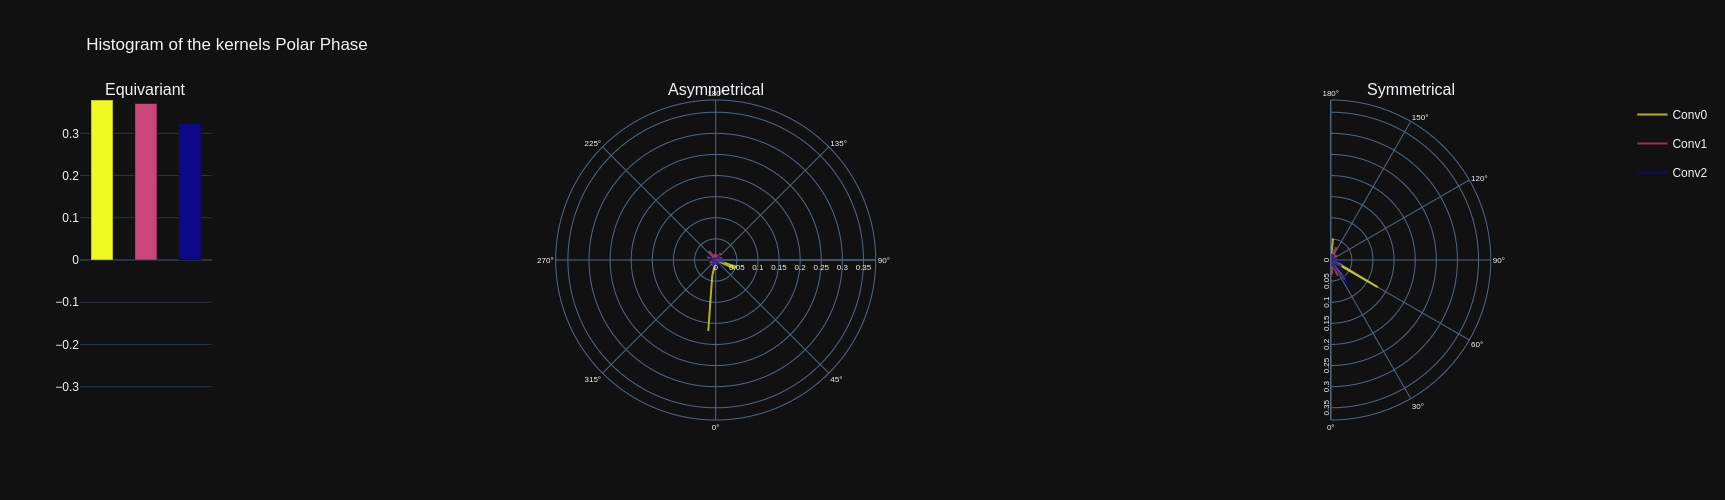

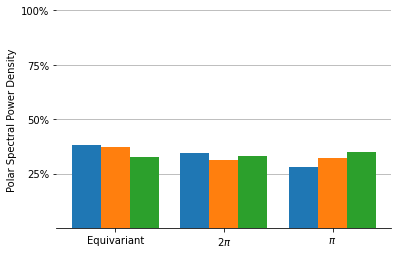

In [12]:
SP3 = SpectralPower.kernels_psp(UNet(1, 1, 8, kernel=5, nscale=1, depth=3, downsampling='conv'))
SP3.plot_sp(split='normed', sort_sym_rank=None)
SP3.plot_phases(True)